# Data visualization

This test allows us to corroborate the proper interpretation of the data of the spectral energy distributions coming from the active galaxies in the example.

## SED plots from example (AGNfitter v1.0)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
import astropy.constants as const
import scipy

In [4]:
# Cosmology thar we asume
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.266)

In [3]:
# Data format
# Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED = np.loadtxt("Examples/catalog_example.txt")

#Observed
z = 0.283                                                   # Redshift

f_obs = (3*1e8)/(SED[0, 2::3]*1e-10)                        # Observed frequency [Hz]
data_Jy = SED[0, 3::3]*u.Jy                                 # Intensity [Jy] 
data = data_Jy.to(u.erg/u.s/(u.cm)**2 /u.Hz).value          # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
D_L = cosmo.luminosity_distance(z).to(u.cm).value           # Relation distance-luminosity
flux =  f_obs*data*4*np.pi*(D_L)**2                         # Flux [erg s⁻¹]

# Uncertainty [erg s⁻¹]
error = f_obs*(SED[0, 4::3]*u.Jy).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L)**2 

# Rest frame frequency [Hz] 
f_rest = [i*(1+z) for i in f_obs] 

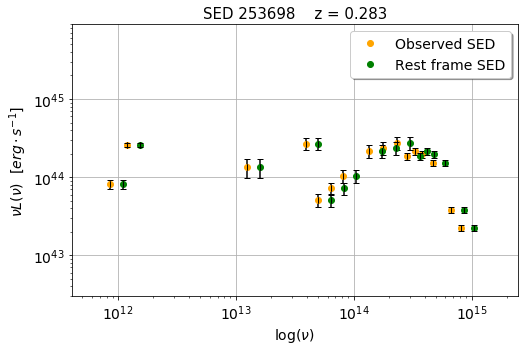

In [4]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux,color = 'orange', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux, color = 'green', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 253698    z = ' + str(z), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(3*1e42, 9*1e45)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

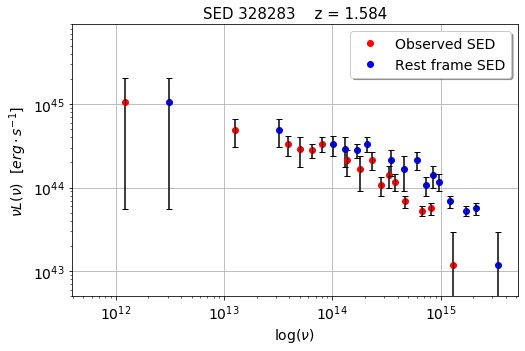

In [5]:
#Observed
z2 = 1.584                                                   # Redshift

f2_obs = (3*1e8)/(SED[1, 2::3]*1e-10)                        # Observed frequency [Hz]
data2_Jy = SED[1, 3::3]*u.Jy                                 # Intensity [Jy] 
data2 = data2_Jy.to(u.erg/u.s/(u.cm)**2 /u.Hz).value         # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
D_L2 = cosmo.luminosity_distance(z2).to(u.cm).value          # Relation distance-luminosity
flux2 =  f2_obs*data2*4*np.pi*(D_L2)**2                      # Flux [erg s⁻¹]

# Uncertainty [erg s⁻¹]
error2 = f2_obs*(SED[1, 4::3]*u.Jy).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L2)**2 

# Rest frame frequency [Hz] 
f2_rest = [i*(1+z2) for i in f2_obs] 


fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f2_obs, flux2,color = 'red', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f2_obs,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f2_rest, flux2,color = 'blue', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f2_rest,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 328283    z = ' + str(z2), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(5*1e42, 9e45)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Plot of a telescope filter

Visualization of telescope filter:

In [6]:
# Subaru telescope transfer function (optical and IR)
Subaru_B = pd.read_csv("Filters/B_subaru.res", sep="  ", decimal=".", names = ['wl', 'I'], skiprows = 0, engine='python')

wl_SB = Subaru_B['wl']*10**(-1) # wavelength [nm]
I_SB = Subaru_B['I'] # Intensity

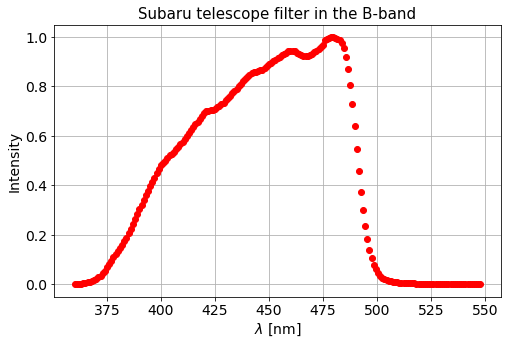

In [7]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'Intensity', fontsize = 14) 
plt.xlabel(r'$\lambda$ [nm]', fontsize = 14) 
plt.plot(wl_SB, I_SB ,color = 'r', marker = 'o', linestyle = '')
plt.grid() 
plt.title('Subaru telescope filter in the B-band', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

Is valid the approximation of central wavelength in v_2.0?

In [8]:
# Data format
SPIRE250 = pd.read_csv("Filters/SPIRE_250mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
SPIRE350 = pd.read_csv("Filters/SPIRE_350mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
PACS100 = pd.read_csv("Filters/PACS_100mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
MIPS70 = pd.read_csv("Filters/mips70.res", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 9)

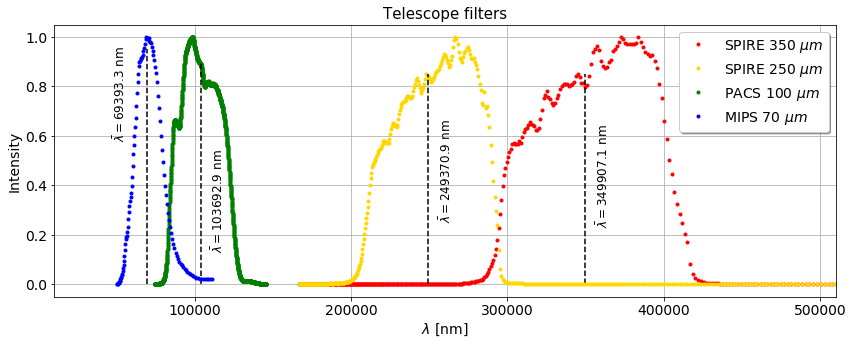

In [9]:
fig = plt.figure(figsize=(14, 5))
plt.ylabel(r'Intensity', fontsize = 14) 
plt.xlabel(r'$\lambda$ [nm]', fontsize = 14) 

plt.plot(SPIRE350['wl']*1e-1, SPIRE350['I'],color = 'r', marker = '.', linestyle = '', label = r'SPIRE 350 $\mu m$')
plt.plot([3499071*1e-1,3499071*1e-1],[0, 0.85],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 349907.1$ nm', xy=(3499071*1e-1, 0.2), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12, rotation = 90)

plt.plot(SPIRE250['wl']*1e-1, SPIRE250['I'],color = 'gold', marker = '.', linestyle = '', label = r'SPIRE 250 $\mu m$')
plt.plot([2493709*1e-1,2493709*1e-1],[0, 0.85],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 249370.9$ nm', xy=(2493709*1e-1, 0.22), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12, rotation = 90)

plt.plot(PACS100['wl']*1e-1, PACS100['I'] ,color = 'g', marker = '.', linestyle = '', label = r'PACS 100 $\mu m$')
plt.plot([1036929*1e-1,1036929*1e-1],[0, 0.90],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 103692.9$ nm', xy=(1036929*1e-1, 0.1), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12,  rotation = 90)

plt.plot(MIPS70['wl']*1e-1, MIPS70['I'],color = 'b', marker = '.', linestyle = '', label = r'MIPS 70 $\mu m$')
plt.plot([693933*1e-1,693933*1e-1],[0, 0.95],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 69393.3$ nm', xy=(693933*1e-1, 0.55), 
             xycoords='data',xytext=(-35, +10), textcoords='offset points', fontsize=12,  rotation = 90)

plt.grid() 
plt.title(r'Telescope filters', fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.xlim(1e4,5.1*1e5)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Plots of Brown data

In [5]:
# Data format
# Number, Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED_Brown_obs = pd.read_csv("Brown_data/brown2018_obs_agnfitter.txt", delim_whitespace=True, decimal=".", skiprows = 0)

In [6]:
# Function to plot SED
def SED_plot(dataframe, galaxy_i, galaxy_f, cosmo, title, ylim_i, ylim_s, legend, SEDobserved):
    
    fig = plt.figure(figsize=(10, 6))
    plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
    plt.xlabel(r'log($\nu$) ', fontsize = 14) 
    
    for i in range(galaxy_i, galaxy_f):
        z = dataframe.iloc[i, 2]                                                    # Redshift
        f_obs = (3*1e8)/(np.array(dataframe.iloc[i, 3::3])*1e-6)                    # Observed frequency [Hz]
        data_Jy = dataframe.iloc[i, 4::3]*u.Jy*1e-3                                 # Spectral flux density [Jy]
        data = np.array([i.to(u.erg/u.s/(u.cm)**2 /u.Hz).value for i in data_Jy])   # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
        D_L = cosmo.luminosity_distance(z).to(u.cm).value                           # Relation distance-luminosity
        flux =  f_obs*data*4*np.pi*(D_L)**2                                         # Flux [erg s⁻¹]
        
        # Uncertainty [erg s⁻¹]
        error = f_obs*np.array([(i*u.Jy*1e-3).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L)**2 for i in dataframe.iloc[i, 5::3]])          
        name = dataframe.iloc[i, 1]                                             # Source name
        
        if SEDobserved == True:
            # OBSERVED SED
            plt.loglog(f_obs, flux, marker = 'o', linestyle = '', label = str(name) + '  z = ' + str(round(z,4)))
            (_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
            for cap in caps:
                cap.set_markeredgewidth(1)
            
        f_rest = f_obs*(1+z)                                           # Rest frame frequency [Hz]   
        
        # REST FRAME SED
        plt.loglog(f_rest, flux, marker = 'o', linestyle = '', label = str(name) + '  Rest Frame ')
        (_, caps, _) = plt.errorbar(f_rest,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
        for cap in caps:
            cap.set_markeredgewidth(1)
            
    plt.grid() 
    plt.title(title, fontsize = 15)
    if legend == True:
        plt.legend(fontsize = 9, shadow = True)
    plt.ylim(ylim_i, ylim_s)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.close()
    #plt.show()
    return fig

The SEDs of the first 3 galaxies will be plotted.

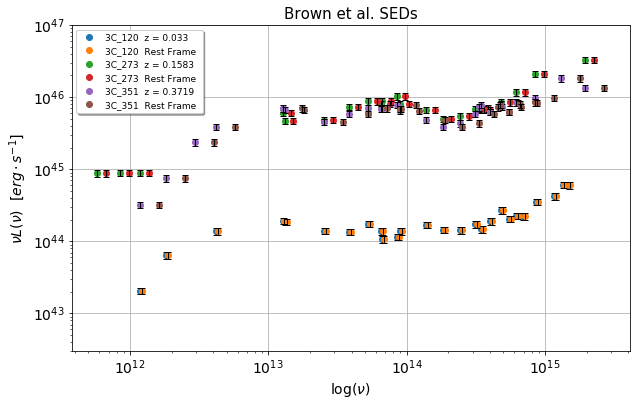

In [7]:
SED_plot(SED_Brown_obs, 1, 4, cosmo, 'Brown et al. SEDs', 3*1e42, 1e47, True, True)

In [8]:
# Data format
# Number, Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED_Brown_syn = pd.read_csv("Brown_data/brown2018_syn_agnfitter-2.txt", delim_whitespace=True, decimal=".", skiprows = 0)

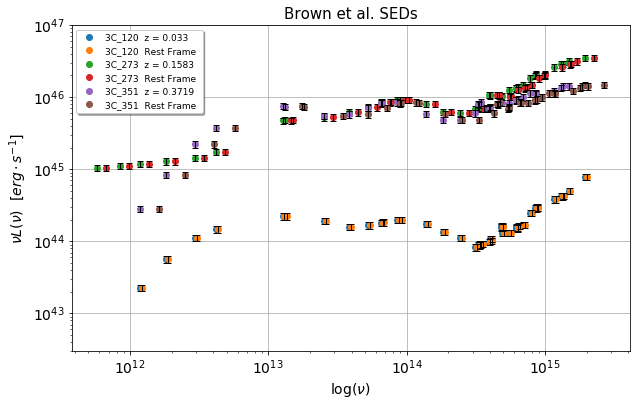

In [9]:
SED_plot(SED_Brown_syn, 1, 4, cosmo, 'Brown et al. SEDs', 3*1e42, 1e47, True, True)

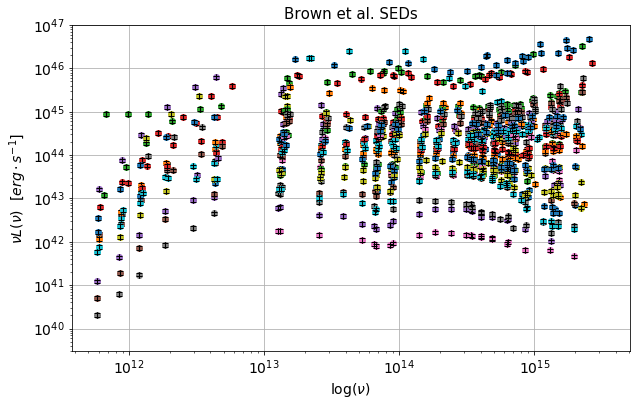

In [14]:
SED_plot(SED_Brown_obs, 0, 41, cosmo, 'Brown et al. SEDs', 3*1e39, 1e47, False, False)

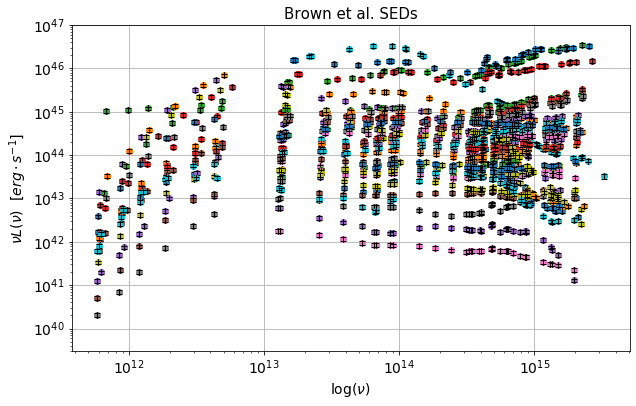

In [10]:
SED_plot(SED_Brown_syn, 0, 41, cosmo, 'Brown et al. SEDs', 3*1e39, 1e47, False, False)

In [27]:
# Function to plot SED
def SED_plot_w(dataframe, galaxy_i, galaxy_f, cosmo, title, ylim_i, ylim_s, legend, SEDobserved):
    
    fig = plt.figure(figsize=(10, 6))
    plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
    plt.xlabel(r'log($\lambda$) ', fontsize = 14) 
    
    for i in range(galaxy_i, galaxy_f):
        z = dataframe.iloc[i, 2]                                                    # Redshift
        f_obs = (3*1e8)/(np.array(dataframe.iloc[i, 3::3])*1e-6)                    # Observed frequency [Hz]
        data_Jy = dataframe.iloc[i, 4::3]*u.Jy*1e-3                                 # Spectral flux density [Jy]
        data = np.array([i.to(u.erg/u.s/(u.cm)**2 /u.Hz).value for i in data_Jy])   # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
        D_L = cosmo.luminosity_distance(z).to(u.cm).value                           # Relation distance-luminosity
        flux =  f_obs*data*4*np.pi*(D_L)**2                                         # Flux [erg s⁻¹]
        
        # Uncertainty [erg s⁻¹]
        error = f_obs*np.array([(i*u.Jy*1e-3).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L)**2 for i in dataframe.iloc[i, 5::3]])          
        name = dataframe.iloc[i, 1]                                             # Source name
        
        if SEDobserved == True:
            # OBSERVED SED
            plt.loglog((3*1e8)/f_obs, flux, marker = 'o', linestyle = '', label = str(name) + '  z = ' + str(round(z,4)))
            (_, caps, _) = plt.errorbar((3*1e8)/f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
            for cap in caps:
                cap.set_markeredgewidth(1)
            
        f_rest = f_obs*(1+z)                                           # Rest frame frequency [Hz]   
        
        # REST FRAME SED
        plt.loglog((3*1e8)/f_rest, flux, marker = 'o', linestyle = '', label = str(name) + '  Rest Frame ')
        (_, caps, _) = plt.errorbar((3*1e8)/f_rest,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
        for cap in caps:
            cap.set_markeredgewidth(1)
            
    plt.grid() 
    plt.title(title, fontsize = 15)
    if legend == True:
        plt.legend(fontsize = 9, shadow = True)
    plt.ylim(ylim_i, ylim_s)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.close()
    #plt.show()
    return fig

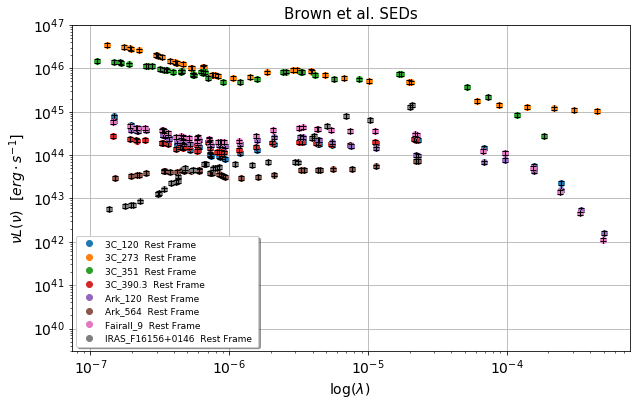

In [34]:
SED_plot_w(SED_Brown_syn, 1, 9, cosmo, 'Brown et al. SEDs', 3*1e39, 1e47, True, False)

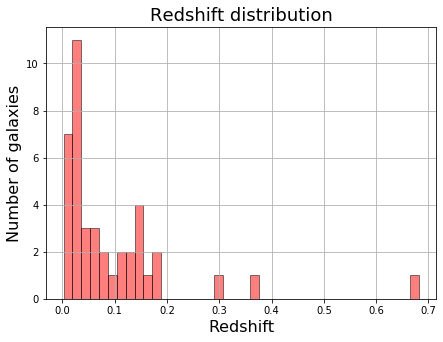

First range of Z: [0.0, 0.016972725]


In [17]:
z = SED_Brown_syn.iloc[:, 2]
bars = 40
fig=plt.figure(figsize=(7,5))
ax = z.plot.hist(edgecolor = 'black', color= 'r', alpha=0.5, bins= bars, zorder = 1)
xt = np.linspace(0, 3.7, 100)
plt.title('Redshift distribution', fontsize = 18 )
plt.xlabel('Redshift', fontsize = 16)
plt.ylabel('Number of galaxies', fontsize = 16)
plt.grid()
plt.show()
print('First range of Z: ' + str([0.0, (z.max()-z.min())/bars]))

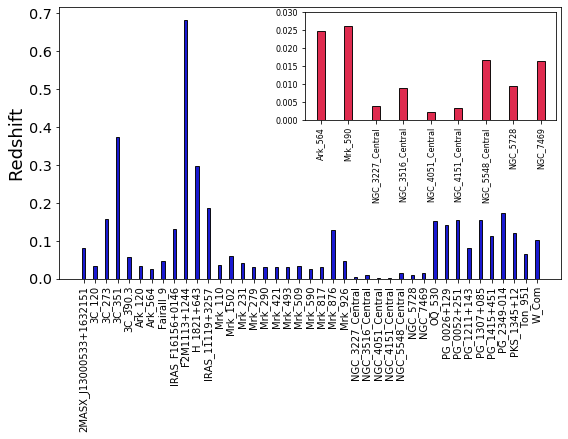

In [21]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

lowz = SED_Brown_syn[SED_Brown_syn['z'] <= 0.03]

fig=plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
#plt.xlabel('Galaxies', linespacing=1, fontsize = 18)
plt.ylabel('Redshift', linespacing=1, fontsize = 18)

#Different bars for different percentiles
plt.bar(SED_Brown_syn.iloc[:, 1],SED_Brown_syn.iloc[:, 2],color='mediumblue',alpha=0.9, edgecolor = 'black', width=0.3)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(size = 'x-large')
inset_axes = inset_axes(ax, 
                    width="50%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)
plt.bar(lowz.iloc[:, 1],lowz.iloc[:, 2],color='crimson',alpha=0.9, edgecolor = 'black', width=0.3)
#plt.title('Probability')
plt.xticks(lowz.iloc[:, 1], fontsize=8, rotation = 90)
plt.yticks(np.linspace(0,0.03, 7),fontsize=8)
plt.show()
#plt.grid(True)

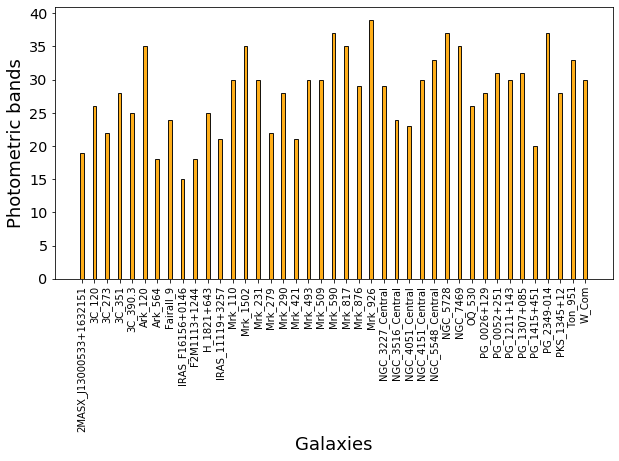

In [15]:
Nbands = []

for i in range(0,41):
    count = 0
    for j in range(1,43):
        if SED_Brown_obs.iloc[i, j*3 +1] > 0:
            count += 1
    Nbands.append(count)        

fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xlabel('Galaxies', linespacing=1, fontsize = 18)
plt.ylabel('Photometric bands', linespacing=1, fontsize = 18)

#Different bars for different percentiles
plt.bar(SED_Brown_syn.iloc[:, 1],Nbands,color='orange',alpha=0.9, edgecolor = 'black', width=0.3)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(size = 'x-large')
plt.show()

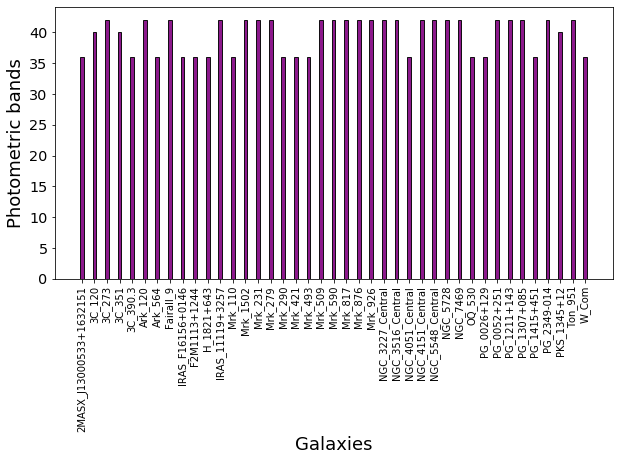

In [13]:
Nbands = []

for i in range(0,41):
    count = 0
    for j in range(1,43):
        if SED_Brown_syn.iloc[i, j*3 +1] > 0:
            count += 1
    Nbands.append(count)        

fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xlabel('Galaxies', linespacing=1, fontsize = 18)
plt.ylabel('Photometric bands', linespacing=1, fontsize = 18)

#Different bars for different percentiles
plt.bar(SED_Brown_syn.iloc[:, 1],Nbands,color='purple',alpha=0.9, edgecolor = 'black', width=0.3)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(size = 'x-large')
plt.show()

In [23]:
SED_Brown_syn.iloc[2, 3::3]

FUV_w1      0.1532
SW2_w1      0.2026
SM2_w1      0.2239
NUV_w1      0.2286
SW1_w1      0.2598
SU_w1       0.3459
Sku_w1      0.3473
u_w1        0.3551
Skv_w1      0.3821
SB_w1        0.434
g_w1        0.4686
pg_w1       0.4832
Skg_w1      0.4885
SV_w1        0.542
r_w1        0.6166
pr_w1       0.6188
Skr_w1      0.6262
i_w1         0.748
pi_w1       0.7525
Ski_w1      0.7677
pz_w1       0.8669
z_w1        0.8932
Skz_w1      0.9207
py_w1       0.9622
J_w1        1.2376
H_w1        1.6476
Ks_w1       2.1621
W1_w1       3.3573
I1_w1       3.5443
I2_w1        4.487
W2_w1       4.6065
I3_w1       5.7104
I4_w1       7.8413
W3_w1      11.8178
W4_w1       22.866
M1_w1      23.6751
P70_w1     71.1519
P100_w1    101.401
P160_w1    163.598
S250_w1    253.602
S350_w1    355.716
S500_w1    519.143
Name: 2, dtype: object

## Dictionaries handling

To understand and redefine the line 142 in RUN_AGNfitter_multi.py

In [14]:
# Dictionary similar to FILTERS_settings() in SETTINGS_AGNfitter.py
filters_settings = dict(z = np.array([0.894, 2.43, 0.731]), path= 'models/FILTERS/', SPIRE500 = [True, 29], Ks_VISTA = [False, 3], r_SDSS= [True, 4], add_filters = False)
filters_settings.keys()

dict_keys(['z', 'path', 'SPIRE500', 'Ks_VISTA', 'r_SDSS', 'add_filters'])

In [15]:
# To choose the type non-booleans values with first position == True --> Filters
[filters_settings[i] for i in filters_settings.keys() if type(filters_settings[i]) != bool and filters_settings[i][0] == True]

[[True, 29], [True, 4]]

In [16]:
# To count and choose the type list values with first position == True --> Filters
print(len([filters_settings[i] for i in filters_settings.keys() if type(filters_settings[i]) == list and filters_settings[i][0] == True]))

# To corroborate that these are filters
print([i for i in filters_settings.keys() if type(filters_settings[i]) == list and filters_settings[i][0] == True])

2
['SPIRE500', 'r_SDSS']


## SED plots from example (AGNfitter v2.0)

In [17]:
# Data format
# Name, redshift, Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED2 = np.loadtxt("Examples/catalog_example2.txt")

#Telescopes wavelengths
l_c = [1516, 2304, 3591, 4723, 6213, 7523, 8855, 4866, 6215, 7545, 8679, 9633, 8798, 10214, 12535, 16453, 21540, 10319, 12510, 16377, 22083, 33792, 46293, 123337, 222532, 1036929, 1697692, 2493709, 3499071, 5041086]

#Observed
z = 0.731                                                   # Redshift

f_obs = [(3*10**8)/(i*10**(-10)) for i in l_c]              # Observed frequency [Hz]
data_Jy = SED2[2, 2::2]*u.Jy*1e-3                           # Intensity [Jy] 
data = data_Jy.to(u.erg/u.s/(u.cm)**2 /u.Hz).value          # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
D_L = cosmo.luminosity_distance(z).to(u.cm).value           # Relation distance-luminosity
flux =  f_obs*data*4*np.pi*(D_L)**2                         # Flux [erg s⁻¹]

# Uncertainty [erg s⁻¹]
error = f_obs*(SED2[2, 3::2]*u.Jy*1e-3).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L)**2 

# Rest frame frequency [Hz] 
f_rest = [i*(1+z) for i in f_obs]                                

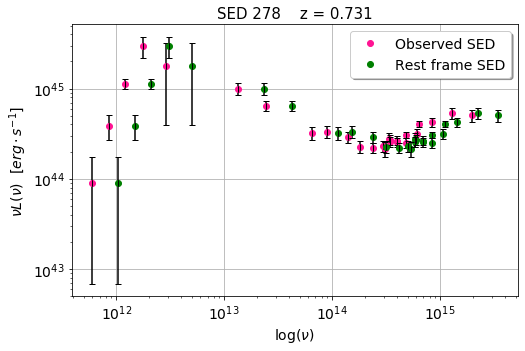

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux,color = 'deeppink', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux ,color = 'green', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 278    z = ' + str(z), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

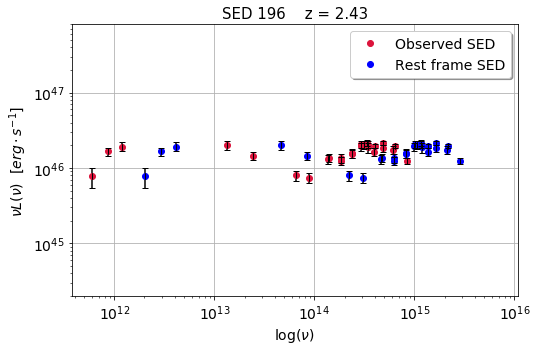

In [20]:
#Observed
z2 = 2.43                                                    # Redshift

f_obs = [(3*10**8)/(i*10**(-10)) for i in l_c]               # Observed frequency [Hz]
data2_Jy = SED2[1, 2::2]*u.Jy*1e-3                           # Intensity [Jy] 
data2 = data2_Jy.to(u.erg/u.s/(u.cm)**2 /u.Hz).value         # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
D_L2 = cosmo.luminosity_distance(z2).to(u.cm).value           # Relation distance-luminosity
flux2 =  f_obs*data2*4*np.pi*(D_L2)**2                         # Flux [erg s⁻¹]

# Uncertainty [erg s⁻¹]
error2 = f_obs*(SED2[1, 3::2]*u.Jy*1e-3).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L2)**2 

# Rest frame frequency [Hz] 
f_rest = [i*(1+z2) for i in f_obs]  


fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux2,color = 'crimson', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux2 ,color = 'blue', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 196    z = ' + str(z2), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(2*1e44, 8*1e47)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()


### Output

Now we present the plot of the parameter values for different percentiles: 2.5, 16, 50, 84 and 97.5. The parameters inferred from the SED fit are: metallicity, exponential decay time, galaxy age, galaxy reddening, dust fraction in starburst, PAH fraction in starburst, column density, BBB reddening, normalisation parameters, absolute magnitude of the galaxy, star formation rate (optical), luminosity of: IR component, BBB, BBB reddened, galaxy, torus and starburst; star formation rate (IR) and likehood (?).

In [21]:
par278 = pd.read_csv("Examples/parameter_outvalues_278.0.txt", delim_whitespace=True, decimal=".", skiprows = 3)

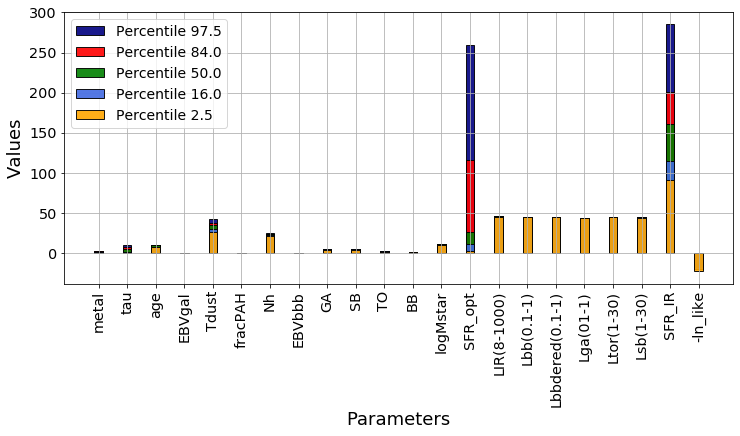

In [22]:
parameters = par278.columns

fig=plt.figure(figsize=(12,5))
plt.xlabel('Parameters', linespacing=1, fontsize = 18)
plt.ylabel('Values', linespacing=1, fontsize = 18)

#Different bars for different percentiles
plt.bar(parameters,par278.iloc[4, :],color='navy',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 97.5')
plt.bar(parameters,par278.iloc[3, :],color='red',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 84.0')
plt.bar(parameters,par278.iloc[2, :],color='green',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 50.0')
plt.bar(parameters,par278.iloc[1, :],color='royalblue',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 16.0')
plt.bar(parameters,par278.iloc[0, :],color='orange',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 2.5')
plt.xticks(rotation=90)
plt.xticks(size = 'x-large')
plt.yticks(size = 'x-large')

plt.legend(loc=2, prop={'size': 14})
plt.grid(True)

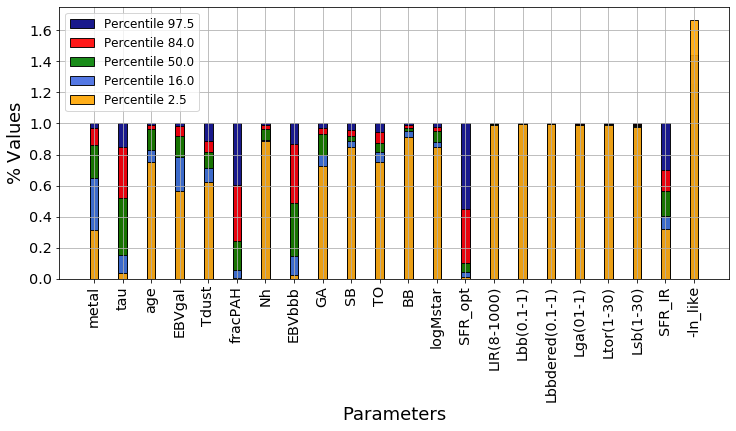

In [23]:
parameters = par278.columns

fig=plt.figure(figsize=(12,5))
plt.xlabel('Parameters', linespacing=1, fontsize = 18)
plt.ylabel(r'$\%$ Values', linespacing=1, fontsize = 18)

#Different bars for different percentiles
plt.bar(parameters,par278.iloc[4, :]/par278.iloc[4, :],color='navy',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 97.5')
plt.bar(parameters,par278.iloc[3, :]/par278.iloc[4, :],color='red',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 84.0')
plt.bar(parameters,par278.iloc[2, :]/par278.iloc[4, :],color='green',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 50.0')
plt.bar(parameters,par278.iloc[1, :]/par278.iloc[4, :],color='royalblue',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 16.0')
plt.bar(parameters,par278.iloc[0, :]/par278.iloc[4, :],color='orange',alpha=0.9, edgecolor = 'black', width=0.3, label='Percentile 2.5')
plt.xticks(rotation=90)
plt.xticks(size = 'x-large')
plt.yticks(size = 'x-large')

plt.legend(loc=2, prop={'size': 12})
plt.grid(True)

In [24]:
SED278 = pd.read_csv("Examples/output_SEDs_278.0.txt", sep = ' ', decimal=".", skiprows = 0)
SED278 = SED278.astype(float)

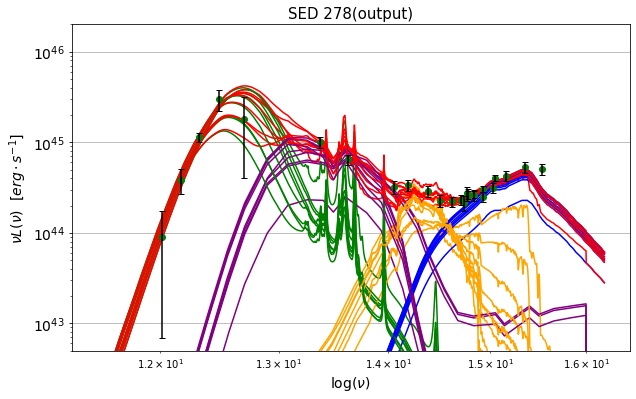

In [33]:
# Data format
# Name, redshift, Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED2 = np.loadtxt("Examples/catalog_example2.txt")

#Telescopes wavelengths
l_c = [1516, 2304, 3591, 4723, 6213, 7523, 8855, 4866, 6215, 7545, 8679, 9633, 8798, 10214, 12535, 16453, 21540, 10319, 12510, 16377, 22083, 33792, 46293, 123337, 222532, 1036929, 1697692, 2493709, 3499071, 5041086]

#Observed
z = 0.731                                                   # Redshift

f_obs = [(3*10**8)/(i*10**(-10)) for i in l_c]              # Observed frequency [Hz]
data_Jy = SED2[2, 2::2]*u.Jy*1e-3                           # Intensity [Jy] 
data = data_Jy.to(u.erg/u.s/(u.cm)**2 /u.Hz).value          # Intensity [erg s⁻¹ cm⁻² Hz⁻¹]
D_L = cosmo.luminosity_distance(z).to(u.cm).value           # Relation distance-luminosity
flux =  f_obs*data*4*np.pi*(D_L)**2                         # Flux [erg s⁻¹]

# Uncertainty [erg s⁻¹]
error = f_obs*(SED2[2, 3::2]*u.Jy*1e-3).to(u.erg/u.s/(u.cm)**2 /u.Hz).value*4*np.pi*(D_L)**2 

# Rest frame frequency [Hz] 
f_rest = [i*(1+z) for i in f_obs]    


fig = plt.figure(figsize=(10, 6))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 

curvas = 9
for i in range(0, curvas):
    log_f = SED278.iloc[:, 0]        # Log frequency [Hz]
    SB = SED278.iloc[:, 1+i]         # Starburst
    BB = SED278.iloc[:, 11+i]        # Blue bump
    GA = SED278.iloc[:, 21+i]        # Galaxy
    TO = SED278.iloc[:, 31+i]        # Torus
    TOTAL = SED278.iloc[:, 41+i]     # Total
    BB_dr = SED278.iloc[:, 51+i]     # BB dereddened
    
    # OBSERVED SED
    plt.semilogy(log_f, SB, marker = '', color = 'green', linestyle = '-', label = 'SB')
    plt.semilogy(log_f, BB, marker = '', color = 'blue', linestyle = '-', label = 'BB')
    plt.semilogy(log_f, GA, marker = '', color = 'orange', linestyle = '-', label = 'GA')
    plt.semilogy(log_f, TO, marker = '', color = 'purple', linestyle = '-', label = 'TO')
    plt.semilogy(log_f, TOTAL, marker = '', color = 'red', linestyle = '-', label = 'TOTAL')
    #plt.semilogy(log_f, BB_dr, marker = '', color = 'c', linestyle = '-', label = 'BB_dr')
    
    
plt.loglog(np.log10(f_rest), flux ,color = 'green', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(np.log10(f_rest),  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black', zorder = 10)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.grid() 
plt.title('SED 278(output)', fontsize = 15)
#plt.legend(fontsize = 10, shadow = True, loc=8)
plt.ylim(5*1e42, 2*1e46)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Run options

You can:
- To choose the number of cpus to multiprocessing
- To run the code for a specific single source
- To create independent model dictionaries for each source
- To overwrite model files

<img src="Examples/Run_options.png" width="850">

## Independent vs non-independent model dictionaries

It is important to create one model dictionary per source according to the redshift of each one. If a global model dictionary is used, the contributions of each components are differents and therefore the physical properties of the active galaxy.

<table><tr><td><img src="Examples/SED_196_i.png" width="870"></td><td><img src="Examples/SED_196_ni.png" width="840"></td></tr></table>